#Question 1: Coronavirus Spread.


Selected Texas Cities Map
Handle the logic for the graph, including loading the graph data from the file and
displaying a map (graph) of the given data, with labeled nodes and edges.

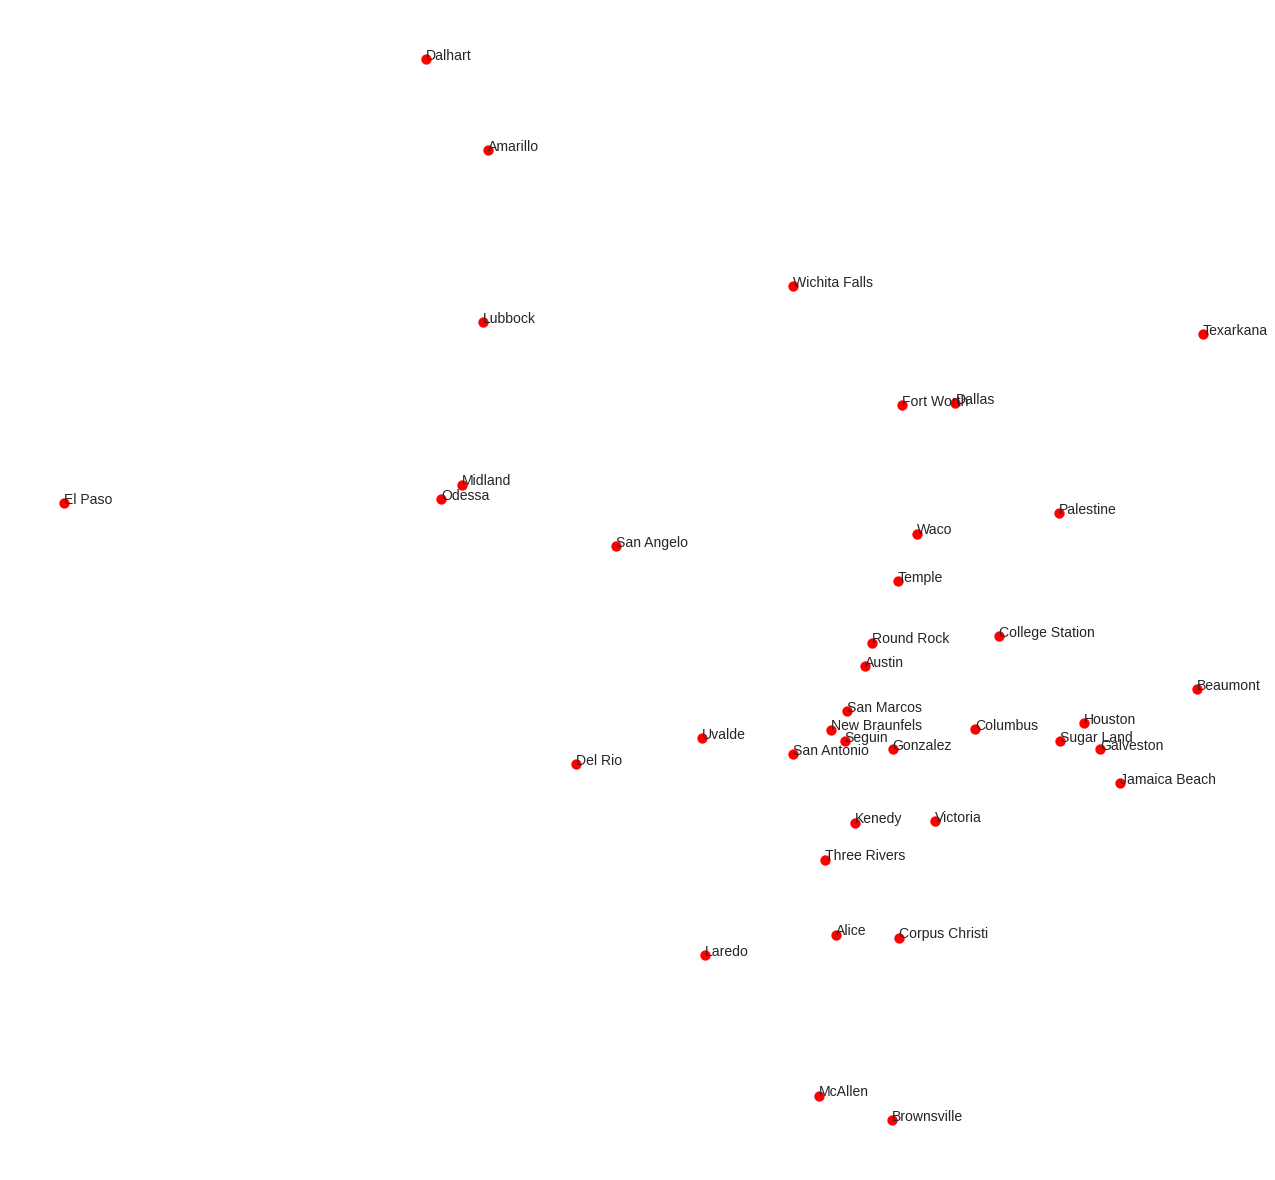

In [ ]:
#These are what we needed imported to get everything working. pyplot was the biggest one
import networkx as nx
import csv
from matplotlib import pyplot as plt
from collections import deque
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib.patches import ConnectionPatch

TexGraph = {}
CityL = {}
RealTexGraph = nx.Graph()

#makes the plot the size to see it
plt.figure(figsize=(20,20))
#Takes the data from nodes_new and places it into the vatiables
data = pd.read_csv('nodes_new.csv')
Cit = data['Abilene']
x = data['32.4543']
y = data['-99.7384']
#Takes the data from mapings and places it into the vatiables
data = pd.read_csv('mappings.csv')
C1 = data['San Angelo']
C2 = data['Midland']
Ra = data['112.2834231']
#Actually places them in the scatter plot
plt.scatter(y,x,s=100,color="red")
#labels the scattered points
for i, label in enumerate(City):
   plt.annotate(label, (y[i], x[i]))
plt.axis('off')
#shows the scatter plot
plt.show()


Search 1: Coronavirus spread
The goal of the Coronavirus spread agent is to show how the virus gets spread
around the cities of Texas if the first confirmed case appeared in Texarkana. The
speed that the virus will move is a constant of 25 miles per hour. Running this cell
should print the sequence of cities that get “infected” of the Coronavirus to their
optimal solution.

In [ ]:
with open('nodes_new.csv') as csv_file:
   nodes = csv.reader(csv_file, delimiter=',')
   for node in nodes:
       RealTexGraph.add_node(node[0], pos=(float(node[1]), float(node[2])))
       CityL[node[0]] = [float(node[1]), float(node[2])]
       TexGraph[node[0]] = []
with open('mappings.csv') as csv_file:
   edges = csv.reader(csv_file, delimiter=',')
   for edge in edges:
       RealTexGraph.add_edge(edge[0], edge[1], weight=float(edge[2]))
       temp = [edge[1], float(edge[2])]
       temp1 = [edge[0], float(edge[2])]
       TexGraph[edge[0]].append(temp)
       TexGraph[edge[1]].append(temp1)

def First_Wave(graph, source):
   queue = deque([source])
   infected = {source: True}
   while queue:
       city = queue.popleft()
       print("Infecting: " + city, end="\n")
       for next_city in graph[city]:
           if next_city[0] not in infected:
               queue.append(next_city[0])
               infected[next_city[0]] = True

def sort(city_list):
   length = len(city_list)
   for i in range(0, length):
       for j in range(0, length - i - 1):
           if city_list[j][1] > city_list[j + 1][1]:
               temp_city = city_list[j]
               city_list[j] = city_list[j + 1]
               city_list[j + 1] = temp_city
   return city_list

for city in TexGraph:
   TexGraph[city] = sort(TexGraph[city])
First_Wave(TexGraph, 'Three Rivers')
def straight_line_distance(node1, node2):
   [x1, y1] = node1
   [x2, y2] = node2
   return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

heuristic_dict = {}
for city in CityL:
   heuristic_dict[city] = straight_line_distance(CityL['Amarillo'], CityL[city])
def a_star_search(graph, start, goal, heuristic_dist):
   route = []
   InFR = {}
   CC = {}
   InFR[start] = heuristic_dist[start]
   explored = {}
   CostC = {}
   explored[start] = None
   CostC[start] = 0

   while InFR:
       res = list(InFR.keys())[0]
       CC[res] = InFR.pop(res)
       route.append(res)
       if res == goal:
           break
       for next_city in graph[res]:
           new_cost = CostC[res] + heuristic_dict[res] + heuristic_dict[next_city[0]]
           if next_city[0] not in CostC or new_cost < CostC[next_city[0]]:
               CostC[next_city[0]] = new_cost
               priority = new_cost + heuristic_dict[next_city[0]]
               InFR[next_city[0]] = priority
               explored[next_city[0]] = CC

   return route, explored, CostC

Infecting: Three Rivers
Infecting: Kenedy
Infecting: Alice
Infecting: San Antonio
Infecting: Corpus Christi
Infecting: Laredo
Infecting: McAllen
Infecting: New Braunfels
Infecting: Seguin
Infecting: Uvalde
Infecting: San Angelo
Infecting: Victoria
Infecting: Brownsville
Infecting: San Marcos
Infecting: Gonzalez
Infecting: Columbus
Infecting: Del Rio
Infecting: Abilene
Infecting: Midland
Infecting: Lubbock
Infecting: Austin
Infecting: Houston
Infecting: Odessa
Infecting: Amarillo
Infecting: Round Rock
Infecting: College Station
Infecting: Sugar Land
Infecting: Galveston
Infecting: Beaumont
Infecting: El Paso
Infecting: Dalhart
Infecting: Temple
Infecting: Waco
Infecting: Jamaica Beach
Infecting: Dallas
Infecting: Fort Worth
Infecting: Palestine
Infecting: Texarkana
Infecting: Wichita Falls


Search 2: Vaccine distribution search
Assuming that the vaccine was found abroad (EU), discover what’s the fastest way
to distribute the vaccine from either from Galveston or from Corpus Christi to the
focus area as it is Amarillo. For this search, you need to find the fastest route from
each of them and select which would be the best port to receive the vaccine.
Assume that the average speed of the distribution trucks is 70 miles per hour.
Running this cell should print the sequence of cities to the optimal solution for
both ports and display the best as a conclusion.

In [ ]:
def a_star_search(graph, start, goal, heuristic_dist):
   route = []
   InFR = {}
   CC = {}
   InFR[start] = heuristic_dist[start]
   explored = {}
   CostC = {}
   explored[start] = None
   CostC[start] = 0

   while InFR:
       res = list(InFR.keys())[0]
       CC[res] = InFR.pop(res)
       route.append(res)
       if res == goal:
           break
       for next_city in graph[res]:
           new_cost = CostC[res] + heuristic_dict[res] + heuristic_dict[next_city[0]]
           if next_city[0] not in CostC or new_cost < CostC[next_city[0]]:
               CostC[next_city[0]] = new_cost
               priority = new_cost + heuristic_dict[next_city[0]]
               InFR[next_city[0]] = priority
               explored[next_city[0]] = CC
   return route, explored, CostC

route_g, explored_g, CostC_g = a_star_search(TexGraph, 'Galveston', 'Amarillo', heuristic_dict)
print("The Vaccine path from Galveston to Amarillo")
print("Route Taken with Cost")
print(CostC_g)

route_cc, explored_cc, CostC_cc = a_star_search(TexGraph, 'Corpus Christi', 'Amarillo', heuristic_dict)
print("The Vaccine path from Corpus Christi to Amarillo")
print("Route Taken with Cost")
print(CostC_cc)

The Vaccine path from Galveston to Amarillo
Route Taken with Cost
{'Galveston': 0, 'Jamaica Beach': 17.850123957267023, 'Houston': 17.18310792658525, 'Sugar Land': 33.983258790749375, 'Columbus': 33.24425141179723, 'College Station': 32.83420823789635, 'Beaumont': 34.86022509699606, 'Austin': 32.00296746397924, 'Seguin': 47.67230914656195, 'Waco': 45.93903079909459, 'Round Rock': 44.63761485168031, 'San Marcos': 44.973984923698204, 'New Braunfels': 58.207638133699376, 'Gonzalez': 58.75047150981421, 'San Antonio': 61.10241144403648, 'Temple': 56.93653310708646, 'Dallas': 57.44506003091824, 'Fort Worth': 56.93221806597518, 'Palestine': 58.91663238240107, 'Victoria': 73.93452942488732, 'Three Rivers': 75.37937790808073, 'Uvalde': 73.76174432540697, 'San Angelo': 71.72230655665813, 'Texarkana': 70.9966709363882, 'Wichita Falls': 65.57196469339185, 'Corpus Christi': 90.63887791173502, 'Kenedy': 90.55884035873257, 'Alice': 91.3801882235058, 'Del Rio': 85.70844584506285, 'Abilene': 79.1757384

# Question 2: Analysis.

# III. Bonus Question

If the search algorithms for Vaccine Distribution and the Coronavirus Spreads were run
simultaneously, in which city would they meet? Assume that you select the port of entry
as the answer for Search 2. Justify your response